# Import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import DataSet

In [2]:
data = pd.read_csv('Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# visualize

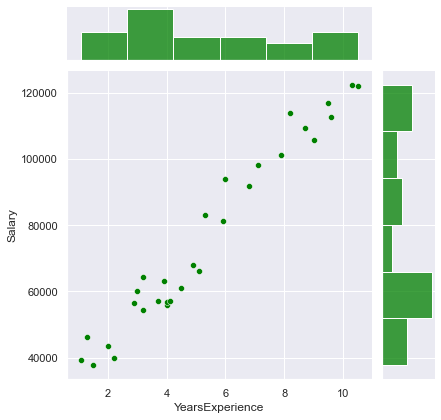

In [11]:
sns.jointplot(x='YearsExperience', y = 'Salary',data = data,color='green')

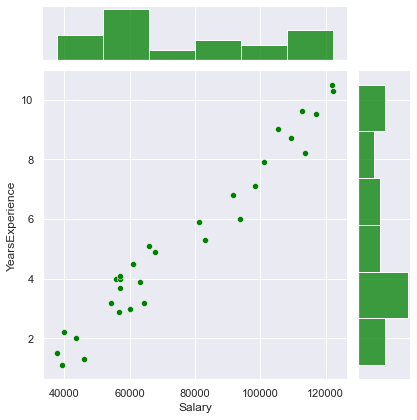

In [12]:
sns.jointplot(y='YearsExperience', x = 'Salary',data = data,color='green')

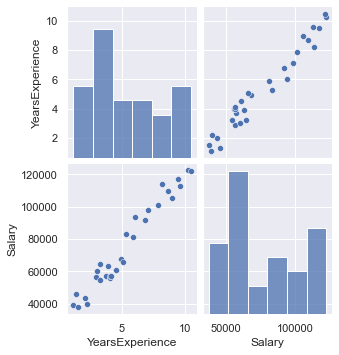

In [7]:
sns.pairplot(data)

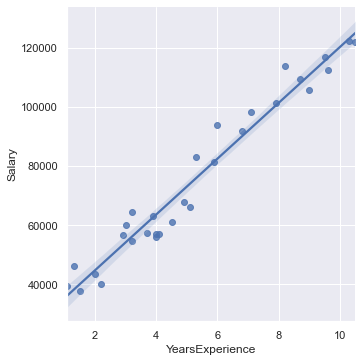

In [13]:
sns.lmplot(x='YearsExperience',y= 'Salary', data = data)

# Spliting the dataset

In [14]:
X = data[['YearsExperience']]

In [16]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [17]:
y = data['Salary']

In [18]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [61]:
X_train.shape

(21, 1)

In [62]:
X_test.shape

(9, 1)

In [63]:
y_train.shape

(21,)

In [64]:
y_test.shape

(9,)

# training the model

In [65]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = True)
reg.fit(X_train,y_train)

LinearRegression()

In [66]:
print('Linear Model Coefficient(m) : ', reg.coef_)
print('Linear Model Coefficient(b) : ', reg.intercept_)

Linear Model Coefficient(m) :  [9339.08172382]
Linear Model Coefficient(b) :  25918.438334893202


# Testing the model

In [67]:
y_predict = reg.predict(X_test)

In [68]:
print(y_predict)

[115573.62288352  71679.93878159 102498.90847018  75415.57147111
  55803.4998511   60473.04071301 122110.98009019 107168.44933209
  63274.76523015]


In [69]:
print(y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64


Text(0.5, 1.0, 'YearsExperience vs Salary (training set)')

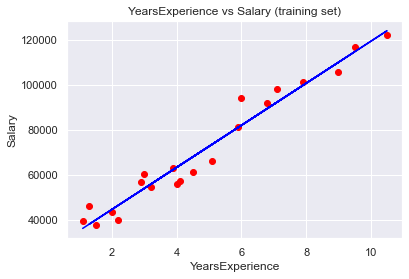

In [70]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary (training set)')

Text(0.5, 1.0, 'YearsExperience vs Salary (test set)')

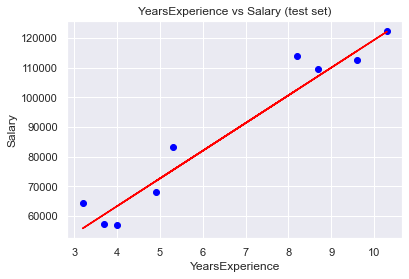

In [71]:
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,reg.predict(X_test),color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary (test set)')

# predicting

In [72]:
salary = reg.predict(pd.DataFrame(np.array([15])))

In [73]:
salary

array([166004.66419212])

# accuracy of model

In [74]:
from sklearn.metrics import r2_score

In [77]:
acc = np.round(r2_score(y_test,y_predict)*100,2)

In [78]:
print(f'{acc}%')

94.14%
